# Neural Networks and Deep Learning

- This is the start of my journey for NN and DL following the book [Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

- The part 2 of the book details about the concepts of NN/DL along with tensorflow 2.0 implementations

- Some other resources might be referred as well for conceptual understanding

In [3]:
# Using the NN env

!conda info --env

# conda environments:
#
base                     /Users/PushpakRuhil/opt/anaconda3
nn                    *  /Users/PushpakRuhil/opt/anaconda3/envs/nn



In [5]:
import numpy as np
import tensorflow as tf

***
- We know the basics of ANN, how it all started from BNN
- Let's directly jump into the deeper topics

# Perceptron

- Simplest ANN architecture
- Based on a slightly different artificial neuron called Threshold Logic Unit (TLU)
    - Or sometimes called Linear Threshold Unit (LTU)
- TLU computes a weighted sum of the inputs ($\textbf{X}^T\textbf{w}$)
- Then applies a step function and outputs the result

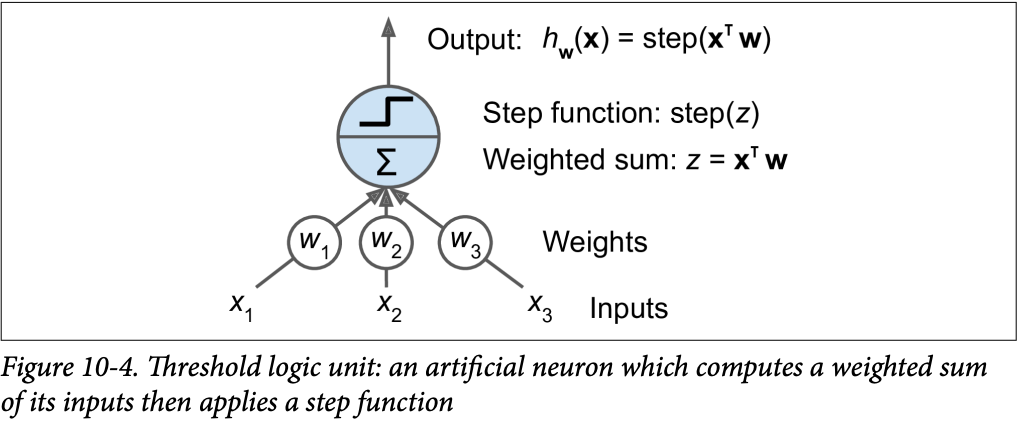


## Common step functions


$$
\text{heaviside}(z) = \begin{cases}
0 & \text{if }z<0\\
1 & \text{if }z>=0
\end{cases}
\\
\\
$$

$$
\text{sgn}(z) = \begin{cases}
-1 & \text{if }z<0\\
0 & \text{if }z=0\\
1 & \text{if }z>0
\end{cases}
$$
***

- Fully connected(or dense) layer: every neuron in one layer is connected to every neuron in the previous layer
- Bias unit: Like an intercept, $x_0 = 1$

## Mathematical notation
$$
h_{W, b}(X) = \phi (XW + b)
$$

Here:
- **X** is the feature matrix
    - shape: (#data_points, #features)
- **W** is the weight matrix. This doesn't include the wieghts of the bias neurons
    - shape: (#features, #artificial_neuron_in_the_layer)
- **b** is the bias vector. Contains the weights between the bias neuron and the artificial neurons
    - One bias term per artificial neuron
- $\phi$ is the Activation function.
    - For TLUs, it's the step function

## Weight update rule for perceptron

- From MLT:
    $$
    w^{t+1} = w^t + x_iy_i
    $$

- From book:
    $$
    w_{i,j}^{(\text{next step})} = w_{i,j} + \eta(y_j - \hat{y_j})x_i
    $$
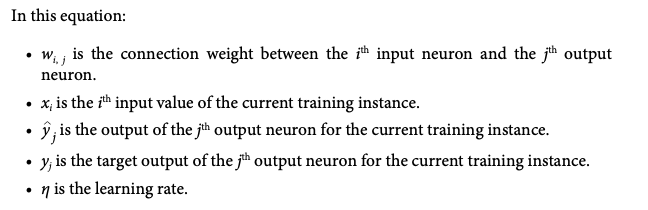   

- Linear decision boundary

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [12]:
X, y = load_iris(return_X_y=True)
X = X[:, (2,3)]
y = (y == 0).astype(int)

In [13]:
percp = Perceptron()
percp.fit(X, y)

Perceptron()

In [14]:
percp.predict([[2,0.5]])

array([0])

- **A Perceptron alone CANNOT solve the XOR problem**

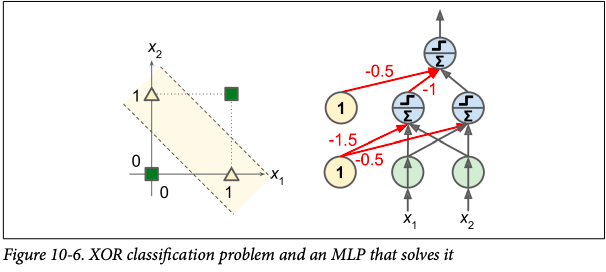

# Multilayer Perceptron and Backpropogation

- To learn more complex patterns and models

Composed of:
1) Passthrough (input) layer
1) one or more TLUs called the hidden layers
1) one last TLU called the output layer

- The layers close to the input layer are usually called the lower layers 
- The ones close to the outputs are usually called the upper layers
- Every layer except the output layer includes a bias neuron and is fully connected to the next layer

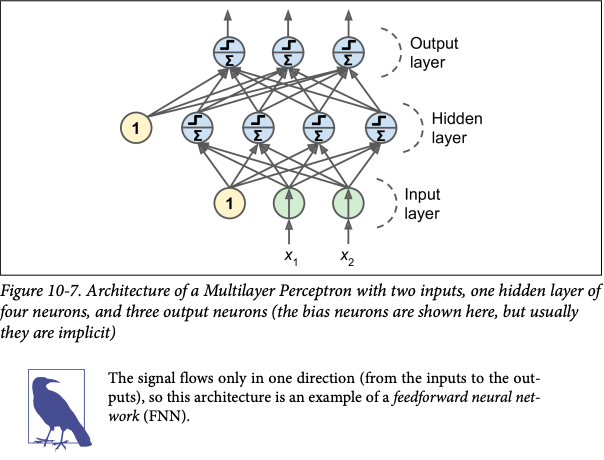

- When an ANN contains a deep stack of hidden layers, it's called a **deep neural network**
    - The definition of number of layers in DNN is fuzzy
    

- MLP is a feed-forward neural network

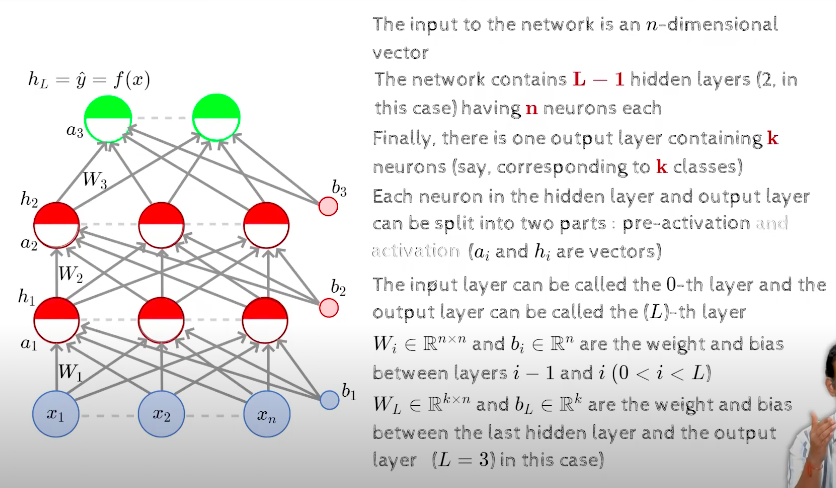

- Pre-activation at any layer $i$ (white region of the neurons) is given by:
$$
a_i(x) = b_i + W_ih_{i-1}(x)
$$

As an example, for $a_1$, we would have the following:

$$ a_1 = 
\begin{bmatrix}
a_{11} \\ a_{12} \\ a_{13}
\end{bmatrix} = 
\begin{bmatrix}
b_1 \\ b_2 \\ b_3
\end{bmatrix} + 
\begin{bmatrix}
W_{111} & W_{112} & W_{113}\\
W_{121} & W_{122} & W_{123}\\
W_{131} & W_{132} & W_{133}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
$$

- Activation at layer $i$  (red region of the neurons) is given by:
$$
h_i(x) = g(a_i(x))
$$

As an example, for $a_1$, we would have the following:

$$
h_1(x) = g \left( \begin{bmatrix}
a_{11} \\ a_{12} \\ a_{13}
\end{bmatrix} \right) = \begin{bmatrix}
g(a_{11}) \\ g(a_{12}) \\ g(a_{13})
\end{bmatrix}
$$
element wise activation

Using sigmoid activation function:
$$
g(a_{11}) = \dfrac{1}{1+ e^{-a_{11}}}
$$

- Activation at the output layer is given by:

$$
h_L(x) = \hat{y} = f(x) = O(a_L(x))
$$

- A different function O because we may or may not use sigmoid function for output

- We can expand to get a mathematical equation:
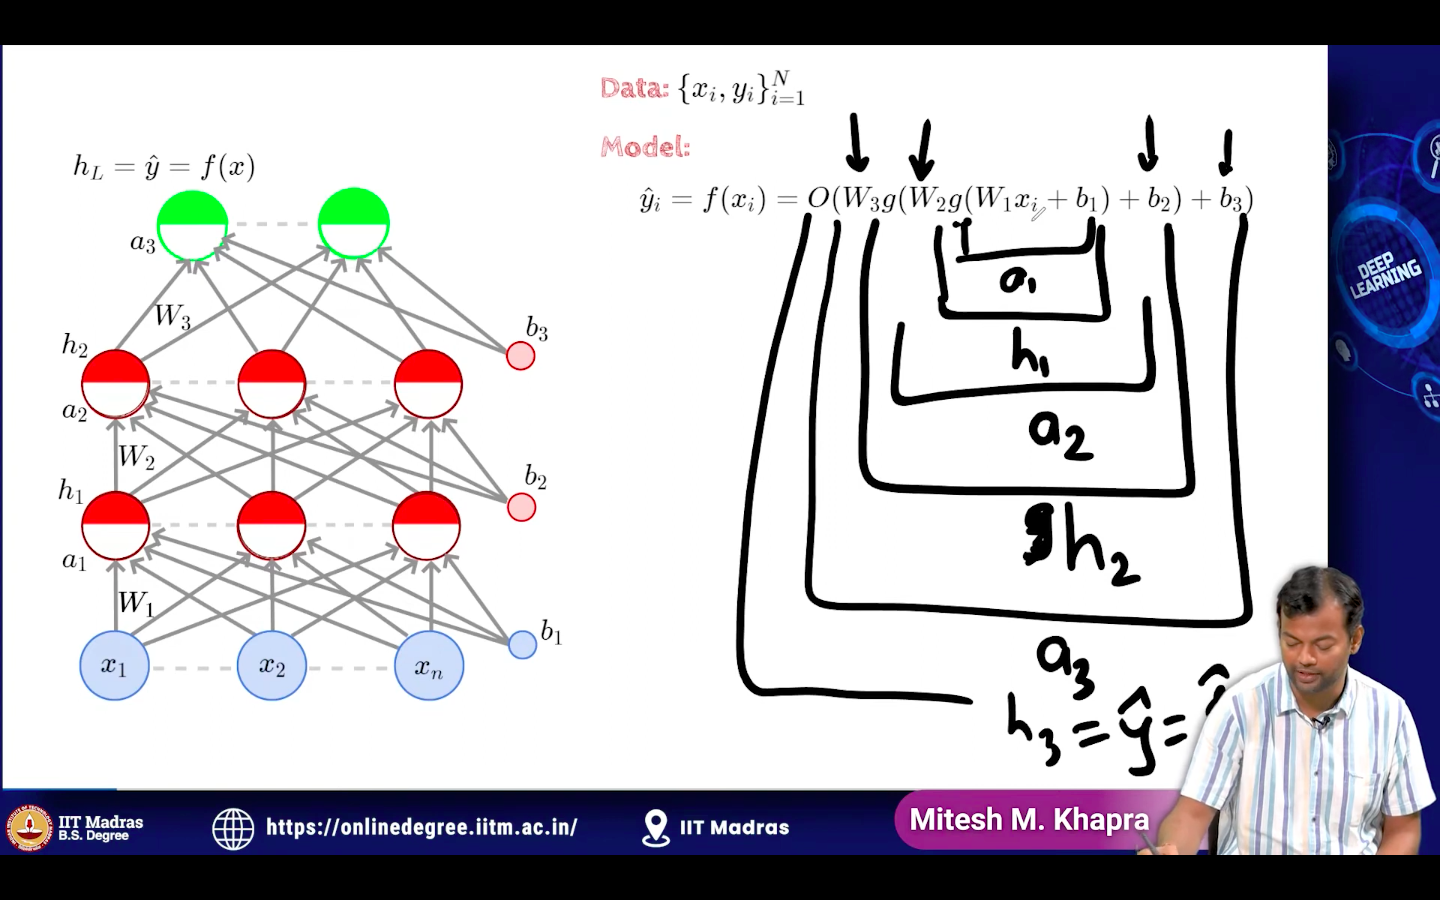

## Algorithm summarized
- It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
- Each mini-batch is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). 
- The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since theyare needed for the backward pass.

- Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
- Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.

- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. 
- As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

## Typical Regression MLP Architecture

- Typically, no activation function is used for regression output
- If the output needs to be strictly positive, we can use ReLU function ($max(0, z)$) for output
- Alternatively, we can use softplus function ($log(1+e^z)$)

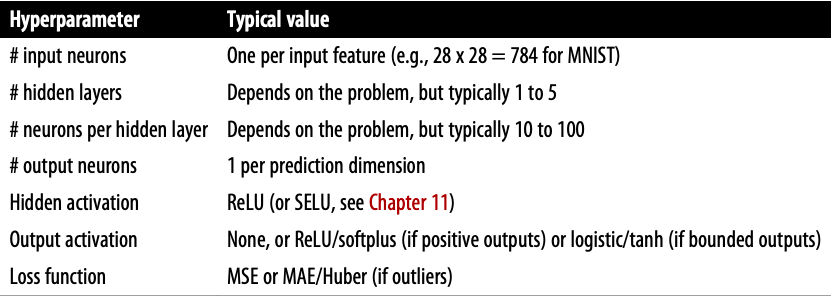

## Typical Classification MLP Architecture

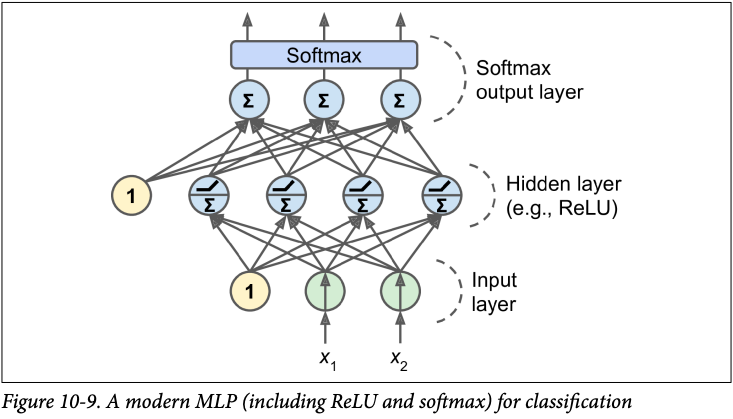

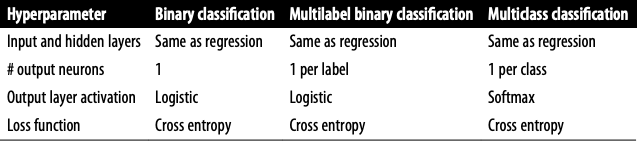


## Implementing MLP using Keras

- Let's look at an implementation of MLP using TF and Keras

In [15]:
tf.__version__

'2.15.0'

### Building an Image Classifier using the Sequential API

- We will be working with the fashion dataset

In [22]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [24]:
# Scaling the dataset to 0-1 scale by dividing each value with max intensity

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [27]:
# Defining a list of each class' name
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [29]:
class_names[y_train[0]]

'Coat'

In [30]:
X_train.shape

(55000, 28, 28)

In [33]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape = (28,28) )) # Input/passthrough layer
model.add(keras.layers.Dense(300, activation='relu')) # First hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation='relu')) # Second hidden layer with 100 neurons
model.add(keras.layers.Dense(10, activation='softmax')) # Output layer for 10 unique classes

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***
### Explanation: 
- Line 1 creates a sequential model
    - Simplest keras model for NN
- Line 3 adds a flatten layer with the desired input size
    - Role is to convert each input into a 1D array
    - Computes X.reshape(-1,1)
    - No other parameters, just the size/shape of each instance
- Line 4 adds the first hidden/dense layer with 300 neurons while setting the activation to ReLU
    - Each dense layer manages its own weight matrix
    - Also manages a bias vector
    - After receiving input, it computes the first equation under [Mathematical-notation](#Mathematical-notation)
- Line 5 adds another dense layer with 100 neurons with ReLU activation
- Line 6 adds a final dense layer which is our final layer, with 10 neurons for 10 unique classes with SOFTMAX activation function
    

***
- Instead of adding layers one by one, we can pass a list as well

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28) ), # Input/passthrough layer
    keras.layers.Dense(300, activation='relu'), # First hidden layer with 300 neurons
    keras.layers.Dense(100, activation='relu'), # Second hidden layer with 100 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer for 10 unique classes
])

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


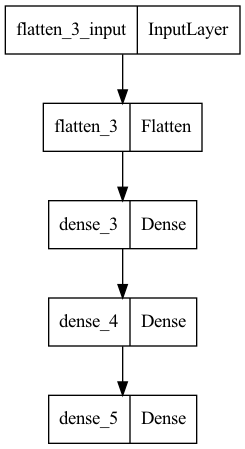

In [42]:
keras.utils.plot_model(model)

In [43]:
model.layers

In [46]:
weights, bias = model.layers[1].get_weights()

In [49]:
weights # Random allocation to break symmetry

# Can set weights using set_weights()

array([[ 0.03292884, -0.06485483, -0.0232309 , ...,  0.00537991,
        -0.01111844,  0.00560678],
       [ 0.02328159,  0.03554747,  0.04436127, ..., -0.07009327,
         0.01514415, -0.02311163],
       [ 0.07213564,  0.00340671,  0.06563522, ...,  0.05870673,
        -0.02582559, -0.04829319],
       ...,
       [ 0.02218346,  0.02125376,  0.04099295, ...,  0.06187263,
         0.07254951, -0.05428466],
       [-0.01383455,  0.01115418, -0.04810392, ..., -0.07002527,
         0.07101655,  0.0424928 ],
       [ 0.01563789, -0.07270544, -0.07325308, ...,  0.04128477,
        -0.05298717, -0.04414459]], dtype=float32)

### Compiling the Model

- Once we have defined the model, we must compile the build to specify the optimizer and the loss

In [53]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd', # Optimize using SGD//back-propogation
    metrics=['accuracy'] # Can pass in a list of metrics to test
             )

In [55]:
model.fit(X_train, y_train,
          epochs=30, validation_data=(X_valid, y_valid)
         )

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4949 - accuracy: 0.8279 - val_loss: 0.4637 - val_accuracy: 0.8394
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4445 - accuracy: 0.8442 - val_loss: 0.4231 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4180 - accuracy: 0.8543 - val_loss: 0.4042 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3967 - accuracy: 0.8592 - val_loss: 0.4072 - val_accuracy: 0.8566
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3820 - accuracy: 0.8657 - val_loss: 0.3811 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3674 - accuracy: 0.8700 - val_loss: 0.3831 - val_accuracy: 0.8646
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3555 - accuracy: 0.8737 - val_loss: 0.3743 - val_accuracy:

- Can set class_weight parameter while calling the fit method to handle class imbalance
- Can pass sample_weight argument to give per-instance weights.
    - Useful when labelling is done by some domain expert while some labelling are done by crowdsourcing platforms

In [68]:
import ctypes
history = ctypes.cast(0x7feb7cff1100, ctypes.py_object).value # Accessing the value at the memory address


In [73]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [75]:
# Most important:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

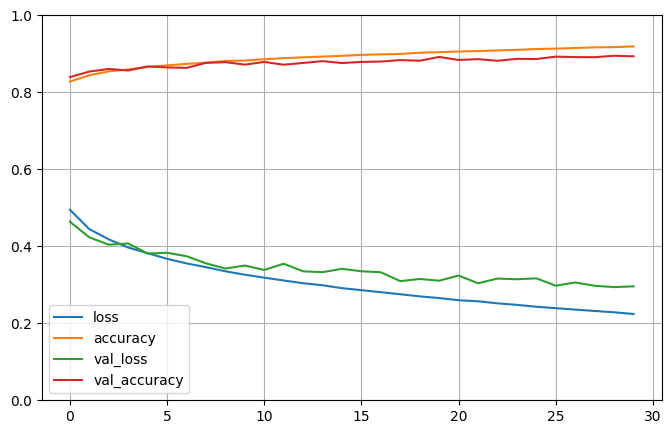

In [76]:
# PLotting history.history
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

- In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. 
- But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. 
- So the training curve should be shifted by half an epoch to the left. 
- If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

### Evaluating the model

- Model can be evaluated using .evaluate() method
    - Not .score


In [77]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 67.2400 - accuracy: 0.8391


[67.2400131225586, 0.8391000032424927]

How to tune the model?
- If not satisfied with the performance, we can tune the hyperparameters
- Start with the learning_rate
- If that doesn't help. then try a different optimizer
    - When changing the optimizer or for the matter of fact, any HP, re-tune the learning rate
- Then go to tuning the model-level HPs like number of hidden layers, neurons, etc etc

### Making Predictions

In [82]:
X_new = X_test[:3]
y_proba = model.predict(X_new) # Predicts the probability of each class
y_proba

1/1 [==============================] - 0s 25ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [86]:
y_pred = np.argmax(model.predict(X_new), 
                   axis=-1)
y_pred

1/1 [==============================] - 0s 52ms/step


array([9, 2, 1])

In [95]:
for i in y_pred:
    print(class_names[i])

Ankle boot
Pullover
Trouser
